In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [4]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 150)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [5]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511),4)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(4):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(4 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        print(number_codes)
        break

1
[[1, 1, 1, 1], [0, 0, 1, 0], [1, 0, 1, 0], [1, 0, 1, 1], [0, 0, 0, 1], [0, 1, 1, 1], [0, 1, 0, 0], [0, 0, 0, 0], [0, 1, 1, 0], [1, 0, 0, 1]]


In [6]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:649
number of class2:968

 ****** Running generation 0 ****** 

Population's average fitness: 0.52176 stdev: 0.09881
Best fitness: 0.74521 - size: (2, 13) - species 3 - id 25
Average adjusted fitness: 0.314
Mean genetic distance 2.946, standard deviation 0.492
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 20.683 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57770 stdev: 0.10080
Best fitness: 0.79097 - size: (2, 14) - species 13 - id 256
Average adjusted fitness: 0.257
Mean genetic distance 3.029, standard deviation 0.495
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 22.514 sec (21.599 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59533 stdev: 0.09992
Best fitness: 0.79097 - size: (2, 14) - species 1 - id 256
Average adjusted fitness: 0.295
Mean genetic distance 3.064, standard deviation 0.505
Population of 199 members in 31 species
Total extinc

Population's average fitness: 0.67602 stdev: 0.10262
Best fitness: 0.84416 - size: (5, 19) - species 6 - id 2104
Average adjusted fitness: 0.288
Mean genetic distance 3.142, standard deviation 0.493
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 44.907 sec (31.923 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.68727 stdev: 0.10297
Best fitness: 0.84416 - size: (5, 19) - species 6 - id 2104
Average adjusted fitness: 0.327
Mean genetic distance 3.176, standard deviation 0.500
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 35.359 sec (33.073 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.68899 stdev: 0.09192
Best fitness: 0.84416 - size: (5, 19) - species 6 - id 2104
Average adjusted fitness: 0.287
Mean genetic distance 3.171, standard deviation 0.504
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 36.183 sec (33.663 average)

 ***

Population's average fitness: 0.68576 stdev: 0.11898
Best fitness: 0.85591 - size: (7, 25) - species 29 - id 5160
Average adjusted fitness: 0.295
Mean genetic distance 3.114, standard deviation 0.574
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 38.430 sec (38.757 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.69200 stdev: 0.09780
Best fitness: 0.85591 - size: (7, 25) - species 29 - id 5160
Average adjusted fitness: 0.292
Mean genetic distance 3.159, standard deviation 0.556
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 40.047 sec (38.949 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.66797 stdev: 0.12335
Best fitness: 0.85591 - size: (7, 25) - species 29 - id 5160
Average adjusted fitness: 0.269
Mean genetic distance 3.132, standard deviation 0.559
Population of 204 members in 19 species
Total extinctions: 0
Generation time: 39.893 sec (39.052 average)

 

Population's average fitness: 0.70282 stdev: 0.09371
Best fitness: 0.86642 - size: (9, 28) - species 29 - id 10554
Average adjusted fitness: 0.301
Mean genetic distance 3.124, standard deviation 0.550
Population of 207 members in 17 species
Total extinctions: 0
Generation time: 43.707 sec (43.730 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.69030 stdev: 0.11216
Best fitness: 0.86642 - size: (9, 28) - species 29 - id 10554
Average adjusted fitness: 0.292
Mean genetic distance 3.132, standard deviation 0.534
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 47.872 sec (44.151 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.69377 stdev: 0.11133
Best fitness: 0.86642 - size: (9, 28) - species 29 - id 10554
Average adjusted fitness: 0.313
Mean genetic distance 3.168, standard deviation 0.526
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 50.200 sec (44.713 average)

Population's average fitness: 0.68919 stdev: 0.11769
Best fitness: 0.87322 - size: (10, 34) - species 65 - id 13037
Average adjusted fitness: 0.304
Mean genetic distance 3.115, standard deviation 0.561
Population of 205 members in 16 species
Total extinctions: 0
Generation time: 34.315 sec (34.840 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.70343 stdev: 0.11539
Best fitness: 0.87322 - size: (10, 34) - species 65 - id 13037
Average adjusted fitness: 0.354
Mean genetic distance 3.120, standard deviation 0.566
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 35.460 sec (34.740 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.69296 stdev: 0.12171
Best fitness: 0.87322 - size: (10, 34) - species 65 - id 13037
Average adjusted fitness: 0.291
Mean genetic distance 3.117, standard deviation 0.552
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 34.582 sec (34.740 avera

Population's average fitness: 0.70864 stdev: 0.11360
Best fitness: 0.87570 - size: (10, 25) - species 64 - id 16094
Average adjusted fitness: 0.327
Mean genetic distance 3.001, standard deviation 0.511
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 35.077 sec (35.800 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.71062 stdev: 0.12122
Best fitness: 0.87570 - size: (10, 25) - species 64 - id 16094
Average adjusted fitness: 0.408
Mean genetic distance 3.010, standard deviation 0.516
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 36.507 sec (35.862 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.71827 stdev: 0.10818
Best fitness: 0.87570 - size: (10, 25) - species 64 - id 16094
Average adjusted fitness: 0.385
Mean genetic distance 3.024, standard deviation 0.523
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 35.509 sec (35.928 ave

Population's average fitness: 0.71590 stdev: 0.11093
Best fitness: 0.87879 - size: (12, 28) - species 90 - id 21485
Average adjusted fitness: 0.312
Mean genetic distance 3.113, standard deviation 0.532
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 38.473 sec (38.007 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.71464 stdev: 0.12368
Best fitness: 0.87879 - size: (12, 28) - species 90 - id 21485
Average adjusted fitness: 0.352
Mean genetic distance 3.103, standard deviation 0.544
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 42.213 sec (38.560 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.70855 stdev: 0.11531
Best fitness: 0.87879 - size: (12, 28) - species 90 - id 21485
Average adjusted fitness: 0.362
Mean genetic distance 3.091, standard deviation 0.528
Population of 203 members in 17 species
Total extinctions: 0
Generation time: 40.662 sec (38.888 ave

Population's average fitness: 0.64495 stdev: 0.09041
Best fitness: 0.81633 - size: (4, 17) - species 29 - id 2058
Average adjusted fitness: 0.265
Mean genetic distance 3.099, standard deviation 0.494
Population of 195 members in 34 species
Total extinctions: 0
Generation time: 27.331 sec (26.120 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.64941 stdev: 0.08551
Best fitness: 0.81633 - size: (4, 17) - species 29 - id 2058
Average adjusted fitness: 0.273
Mean genetic distance 3.091, standard deviation 0.508
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 26.931 sec (26.234 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.65450 stdev: 0.09313
Best fitness: 0.82437 - size: (4, 17) - species 26 - id 2756
Average adjusted fitness: 0.279
Mean genetic distance 3.091, standard deviation 0.507
Population of 193 members in 32 species
Total extinctions: 0
Generation time: 27.199 sec (26.402 average)

 

Population's average fitness: 0.65580 stdev: 0.09539
Best fitness: 0.83797 - size: (5, 19) - species 26 - id 4604
Average adjusted fitness: 0.256
Mean genetic distance 3.212, standard deviation 0.557
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 31.478 sec (30.596 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.66444 stdev: 0.10175
Best fitness: 0.83797 - size: (5, 19) - species 26 - id 4604
Average adjusted fitness: 0.290
Mean genetic distance 3.178, standard deviation 0.540
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 31.571 sec (30.810 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.65620 stdev: 0.10133
Best fitness: 0.83797 - size: (5, 19) - species 26 - id 4604
Average adjusted fitness: 0.335
Mean genetic distance 3.189, standard deviation 0.550
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 31.919 sec (30.995 average)

 

Population's average fitness: 0.65934 stdev: 0.11275
Best fitness: 0.86024 - size: (6, 20) - species 26 - id 7427
Average adjusted fitness: 0.308
Mean genetic distance 3.091, standard deviation 0.615
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 37.752 sec (36.621 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.66648 stdev: 0.10398
Best fitness: 0.86024 - size: (6, 20) - species 26 - id 7427
Average adjusted fitness: 0.289
Mean genetic distance 3.093, standard deviation 0.599
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 38.338 sec (36.891 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.65438 stdev: 0.11609
Best fitness: 0.86024 - size: (6, 20) - species 26 - id 7427
Average adjusted fitness: 0.273
Mean genetic distance 3.111, standard deviation 0.603
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 38.139 sec (37.131 average)

 

Population's average fitness: 0.65843 stdev: 0.10617
Best fitness: 0.86456 - size: (8, 22) - species 26 - id 11140
Average adjusted fitness: 0.251
Mean genetic distance 3.091, standard deviation 0.559
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 38.630 sec (38.356 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.66009 stdev: 0.10034
Best fitness: 0.86456 - size: (8, 22) - species 26 - id 11140
Average adjusted fitness: 0.257
Mean genetic distance 3.000, standard deviation 0.574
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 38.626 sec (38.368 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.65069 stdev: 0.10640
Best fitness: 0.86456 - size: (8, 22) - species 26 - id 11140
Average adjusted fitness: 0.254
Mean genetic distance 3.057, standard deviation 0.561
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 40.501 sec (38.557 average)

Population's average fitness: 0.68711 stdev: 0.11889
Best fitness: 0.87013 - size: (11, 29) - species 59 - id 17750
Average adjusted fitness: 0.312
Mean genetic distance 3.111, standard deviation 0.543
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 39.576 sec (39.773 average)

 ****** Running generation 115 ****** 

Population's average fitness: 0.70449 stdev: 0.11358
Best fitness: 0.87013 - size: (11, 29) - species 59 - id 17750
Average adjusted fitness: 0.331
Mean genetic distance 3.116, standard deviation 0.545
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 39.322 sec (39.676 average)

 ****** Running generation 116 ****** 

Population's average fitness: 0.70214 stdev: 0.11044
Best fitness: 0.87013 - size: (11, 29) - species 59 - id 17750
Average adjusted fitness: 0.298
Mean genetic distance 3.119, standard deviation 0.538
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 40.945 sec (39.830 ave

Population's average fitness: 0.69003 stdev: 0.12961
Best fitness: 0.87137 - size: (10, 24) - species 66 - id 22053
Average adjusted fitness: 0.335
Mean genetic distance 3.034, standard deviation 0.526
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 41.784 sec (41.448 average)

 ****** Running generation 139 ****** 

Population's average fitness: 0.70817 stdev: 0.11824
Best fitness: 0.87137 - size: (10, 24) - species 66 - id 22053
Average adjusted fitness: 0.307
Mean genetic distance 3.038, standard deviation 0.528
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 43.255 sec (41.652 average)

 ****** Running generation 140 ****** 

Population's average fitness: 0.69086 stdev: 0.13111
Best fitness: 0.87137 - size: (10, 24) - species 66 - id 22053
Average adjusted fitness: 0.364
Mean genetic distance 3.007, standard deviation 0.532
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 40.550 sec (41.648 ave

Population's average fitness: 0.61615 stdev: 0.09141
Best fitness: 0.76129 - size: (4, 18) - species 15 - id 1391
Average adjusted fitness: 0.261
Mean genetic distance 3.108, standard deviation 0.476
Population of 197 members in 41 species
Total extinctions: 0
Generation time: 25.356 sec (25.100 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62014 stdev: 0.09430
Best fitness: 0.76129 - size: (4, 18) - species 15 - id 1391
Average adjusted fitness: 0.242
Mean genetic distance 3.118, standard deviation 0.474
Population of 198 members in 41 species
Total extinctions: 0
Generation time: 25.067 sec (25.185 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61528 stdev: 0.09961
Best fitness: 0.76623 - size: (3, 17) - species 15 - id 1985
Average adjusted fitness: 0.249
Mean genetic distance 3.098, standard deviation 0.469
Population of 198 members in 42 species
Total extinctions: 0
Generation time: 25.181 sec (25.228 average)

 

Population's average fitness: 0.64123 stdev: 0.09896
Best fitness: 0.80210 - size: (7, 25) - species 48 - id 5041
Average adjusted fitness: 0.265
Mean genetic distance 3.212, standard deviation 0.555
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 30.604 sec (29.223 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.63579 stdev: 0.09779
Best fitness: 0.80210 - size: (7, 25) - species 48 - id 5041
Average adjusted fitness: 0.296
Mean genetic distance 3.222, standard deviation 0.563
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 31.266 sec (29.672 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.62221 stdev: 0.11611
Best fitness: 0.80210 - size: (7, 25) - species 48 - id 5041
Average adjusted fitness: 0.272
Mean genetic distance 3.187, standard deviation 0.547
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 30.436 sec (29.971 average)

 

Population's average fitness: 0.64568 stdev: 0.10151
Best fitness: 0.80396 - size: (3, 19) - species 54 - id 6545
Average adjusted fitness: 0.317
Mean genetic distance 3.171, standard deviation 0.598
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 31.734 sec (32.294 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.63317 stdev: 0.10905
Best fitness: 0.80396 - size: (3, 19) - species 54 - id 6545
Average adjusted fitness: 0.281
Mean genetic distance 3.164, standard deviation 0.604
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 31.448 sec (32.307 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.63214 stdev: 0.10777
Best fitness: 0.80396 - size: (7, 25) - species 48 - id 9063
Average adjusted fitness: 0.258
Mean genetic distance 3.148, standard deviation 0.606
Population of 205 members in 17 species
Total extinctions: 0
Generation time: 31.653 sec (32.222 average)

 

Population's average fitness: 0.63993 stdev: 0.11001
Best fitness: 0.81571 - size: (6, 26) - species 54 - id 12105
Average adjusted fitness: 0.277
Mean genetic distance 3.204, standard deviation 0.585
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 35.178 sec (34.764 average)

 ****** Running generation 85 ****** 

Population's average fitness: 0.63641 stdev: 0.11208
Best fitness: 0.81571 - size: (6, 26) - species 54 - id 12105
Average adjusted fitness: 0.248
Mean genetic distance 3.224, standard deviation 0.580
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 35.759 sec (34.956 average)

 ****** Running generation 86 ****** 

Population's average fitness: 0.64325 stdev: 0.10848
Best fitness: 0.81571 - size: (6, 26) - species 54 - id 12105
Average adjusted fitness: 0.270
Mean genetic distance 3.245, standard deviation 0.586
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 35.927 sec (35.194 average)

Population's average fitness: 0.64583 stdev: 0.10113
Best fitness: 0.82870 - size: (7, 29) - species 54 - id 13493
Average adjusted fitness: 0.258
Mean genetic distance 3.218, standard deviation 0.602
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 38.029 sec (36.525 average)

 ****** Running generation 109 ****** 

Population's average fitness: 0.64997 stdev: 0.10012
Best fitness: 0.82870 - size: (7, 29) - species 54 - id 13493
Average adjusted fitness: 0.263
Mean genetic distance 3.218, standard deviation 0.592
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 37.598 sec (36.692 average)

 ****** Running generation 110 ****** 

Population's average fitness: 0.64326 stdev: 0.11108
Best fitness: 0.82870 - size: (7, 29) - species 54 - id 13493
Average adjusted fitness: 0.372
Mean genetic distance 3.209, standard deviation 0.595
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 38.012 sec (36.983 averag

Population's average fitness: 0.64732 stdev: 0.10657
Best fitness: 0.82870 - size: (7, 29) - species 54 - id 13493
Average adjusted fitness: 0.248
Mean genetic distance 3.086, standard deviation 0.613
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 40.915 sec (39.793 average)

 ****** Running generation 133 ****** 

Population's average fitness: 0.63465 stdev: 0.11777
Best fitness: 0.82870 - size: (7, 29) - species 54 - id 13493
Average adjusted fitness: 0.238
Mean genetic distance 3.073, standard deviation 0.616
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 43.274 sec (40.203 average)

 ****** Running generation 134 ****** 

Population's average fitness: 0.64982 stdev: 0.11066
Best fitness: 0.82870 - size: (7, 29) - species 54 - id 13493
Average adjusted fitness: 0.248
Mean genetic distance 3.076, standard deviation 0.592
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 40.857 sec (40.322 averag

Population's average fitness: 0.59336 stdev: 0.08951
Best fitness: 0.80210 - size: (5, 20) - species 16 - id 1088
Average adjusted fitness: 0.266
Mean genetic distance 3.058, standard deviation 0.445
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 24.824 sec (23.405 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59459 stdev: 0.08681
Best fitness: 0.80210 - size: (5, 20) - species 16 - id 1088
Average adjusted fitness: 0.242
Mean genetic distance 3.094, standard deviation 0.440
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 26.523 sec (23.795 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61142 stdev: 0.08289
Best fitness: 0.80210 - size: (5, 20) - species 16 - id 1088
Average adjusted fitness: 0.211
Mean genetic distance 3.097, standard deviation 0.447
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 26.199 sec (24.062 average)

 **

Population's average fitness: 0.64917 stdev: 0.11087
Best fitness: 0.80210 - size: (5, 20) - species 16 - id 1088
Average adjusted fitness: 0.417
Mean genetic distance 3.191, standard deviation 0.500
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 30.681 sec (30.207 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.65728 stdev: 0.10241
Best fitness: 0.80210 - size: (5, 20) - species 16 - id 1088
Average adjusted fitness: 0.253
Mean genetic distance 3.216, standard deviation 0.510
Population of 193 members in 26 species
Total extinctions: 0
Generation time: 32.333 sec (30.459 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.65764 stdev: 0.10828
Best fitness: 0.80210 - size: (5, 20) - species 16 - id 1088
Average adjusted fitness: 0.290
Mean genetic distance 3.240, standard deviation 0.504
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 30.262 sec (30.505 average)

 

Population's average fitness: 0.65772 stdev: 0.12178
Best fitness: 0.82560 - size: (6, 20) - species 36 - id 6595
Average adjusted fitness: 0.324
Mean genetic distance 3.256, standard deviation 0.561
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 33.443 sec (33.431 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.67487 stdev: 0.11469
Best fitness: 0.82560 - size: (6, 20) - species 36 - id 6595
Average adjusted fitness: 0.386
Mean genetic distance 3.222, standard deviation 0.558
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 34.223 sec (33.597 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.66096 stdev: 0.11432
Best fitness: 0.83550 - size: (7, 21) - species 36 - id 8192
Average adjusted fitness: 0.307
Mean genetic distance 3.222, standard deviation 0.563
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 34.376 sec (33.693 average)

 

Population's average fitness: 0.65390 stdev: 0.11255
Best fitness: 0.85529 - size: (6, 20) - species 53 - id 11303
Average adjusted fitness: 0.246
Mean genetic distance 3.154, standard deviation 0.589
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 36.656 sec (37.076 average)

 ****** Running generation 79 ****** 

Population's average fitness: 0.66594 stdev: 0.11224
Best fitness: 0.85529 - size: (6, 20) - species 53 - id 11303
Average adjusted fitness: 0.209
Mean genetic distance 3.140, standard deviation 0.566
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 35.850 sec (36.983 average)

 ****** Running generation 80 ****** 

Population's average fitness: 0.66794 stdev: 0.11209
Best fitness: 0.85529 - size: (6, 20) - species 53 - id 11303
Average adjusted fitness: 0.292
Mean genetic distance 3.144, standard deviation 0.560
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 35.178 sec (36.817 average)

Population's average fitness: 0.65749 stdev: 0.12014
Best fitness: 0.86518 - size: (7, 22) - species 60 - id 13805
Average adjusted fitness: 0.267
Mean genetic distance 3.086, standard deviation 0.547
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 33.053 sec (33.924 average)

 ****** Running generation 103 ****** 

Population's average fitness: 0.66572 stdev: 0.11054
Best fitness: 0.86518 - size: (7, 22) - species 60 - id 13805
Average adjusted fitness: 0.216
Mean genetic distance 3.086, standard deviation 0.548
Population of 203 members in 17 species
Total extinctions: 0
Generation time: 33.118 sec (33.823 average)

 ****** Running generation 104 ****** 

Population's average fitness: 0.66817 stdev: 0.10805
Best fitness: 0.86518 - size: (7, 22) - species 60 - id 13805
Average adjusted fitness: 0.388
Mean genetic distance 3.057, standard deviation 0.562
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 33.494 sec (33.827 averag

Population's average fitness: 0.67293 stdev: 0.10942
Best fitness: 0.86951 - size: (8, 24) - species 53 - id 17300
Average adjusted fitness: 0.243
Mean genetic distance 3.086, standard deviation 0.572
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 30.560 sec (31.423 average)

 ****** Running generation 127 ****** 

Population's average fitness: 0.67113 stdev: 0.11115
Best fitness: 0.86951 - size: (8, 24) - species 53 - id 17300
Average adjusted fitness: 0.309
Mean genetic distance 3.075, standard deviation 0.568
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 27.540 sec (30.968 average)

 ****** Running generation 128 ****** 

Population's average fitness: 0.67504 stdev: 0.11026
Best fitness: 0.86951 - size: (8, 24) - species 53 - id 17300
Average adjusted fitness: 0.297
Mean genetic distance 3.071, standard deviation 0.581
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 27.454 sec (30.565 averag

In [7]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [8]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [9]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(4):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(4 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.4888888888888889

In [10]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[11  0  0  0  0  1  0  0  0  3]
 [ 0 17  1  5  0  1  0  2  3  1]
 [ 1  0 16  4  0  0  0  0  6  0]
 [ 2  0  0  6  0  1  0  0  3 10]
 [ 0  0  0  1 16  4  1  6  0  1]
 [ 1  0  0  2  1  5  9  0  2  1]
 [ 0  0  0  0  1  1  4  1  0  1]
 [ 0  2  0  0  1  0  0 10  1  0]
 [ 1  0  0  0  1  4  4  0  2  0]
 [ 0  0  0  0  0  1  0  0  0  1]]


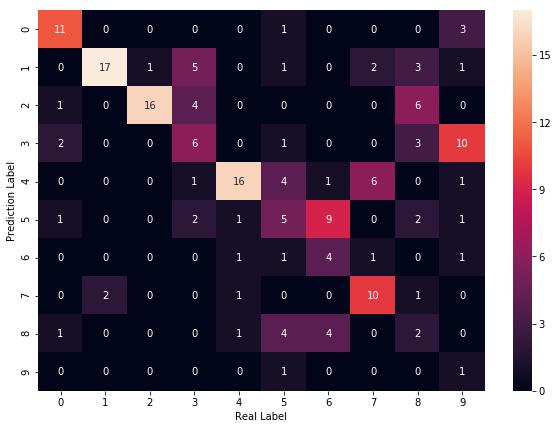

In [11]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [12]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:0 index:[5] real:5
#1 min_error:0 index:[1] real:2
#2 min_error:0 index:[1] real:8
#3 min_error:0 index:[0] real:0
#4 min_error:0 index:[1] real:1
#5 min_error:0 index:[4] real:7
#6 min_error:0 index:[6] real:6
#7 min_error:0 index:[3] real:3
#8 min_error:0 index:[2] real:2
#9 min_error:0 index:[1] real:1
#10 min_error:0 index:[7] real:7
#11 min_error:0 index:[8] real:4
#12 min_error:0 index:[6] real:6
#13 min_error:0 index:[1] real:3
#14 min_error:0 index:[1] real:1
#15 min_error:0 index:[3] real:3
#16 min_error:0 index:[4] real:9
#17 min_error:0 index:[1] real:1
#18 min_error:0 index:[7] real:7
#19 min_error:0 index:[6] real:6
#20 min_error:0 index:[5] real:8
#21 min_error:0 index:[4] real:4
#22 min_error:0 index:[3] real:3
#23 min_error:0 index:[1] real:1
#24 min_error:0 index:[4] real:4
#25 min_error:0 index:[5] real:0
#26 min_error:0 index:[8] real:5
#27 min_error:0 index:[3] real:3
#28 min_error:0 index:[8] real:6
#29 min_error:0 index:[3] real:9
#30 min_error:0 inde

In [13]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(4):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.603586889301175
Avg Base Learner:0.862708719851577


In [14]:
from random import randint

list_acc = []

for iii in range(4):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.08888888888888889
Accuracy on training set: 0.1388888888888889
Accuracy on training set: 0.3
Accuracy on training set: 0.40555555555555556


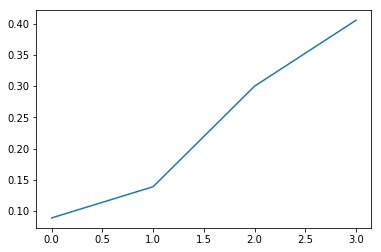

In [15]:
plt.plot(range(4),list_acc)
plt.show()

In [16]:
list_acc

[0.08888888888888889, 0.1388888888888889, 0.3, 0.40555555555555556]